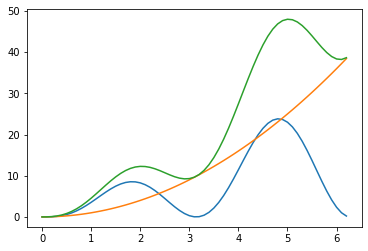

In [20]:
from pylab import np
import matplotlib.pyplot as p
x=np.arange(0.,2.*3.14,0.1)
y=5*x*np.sin(x)**2
y2=x**2
p.plot(x,y)
p.plot(x,y2)
p.plot(x,y+y2)
p.show()

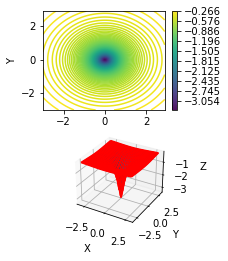

In [15]:

# Plot the potential of a point mass with two methods (two subplots)

import matplotlib.pylab  as p                                     
from mpl_toolkits.mplot3d import Axes3D        

# to make 3-D plot, need Axes3D package from matplot tool kit

delta = 0.1
x = p.arange( -3., 3., delta )
y = p.arange( -3., 3., delta )
X, Y = p.meshgrid(x, y)                 # set coordinate grid matrix, X, Y are 2D array
smooth = 0.3                            # smoothing length to avoid singularity
Z = -1./p.sqrt(X*X+Y*Y+smooth*smooth)                               # Surface height

fig = p.figure()                                    # Create figure

ax = fig.add_subplot(2,2,1)
levels=p.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.) #contour levels#
CS=p.contour(x,y,Z, levels=levels)
# CS=p.contourf(x,y,Z, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.colorbar(CS)

ax = fig.add_subplot(2,2,3,projection='3d')          # the 2 by 2, 4 subplots, the first one
ax.plot_surface(X, Y, Z)                            # Surface
ax.plot_wireframe(X, Y, Z, color = 'r')               # Add wireframe
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


p.show()                                             # Output figure

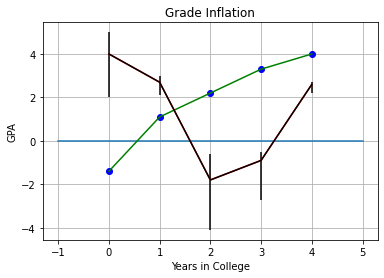

In [21]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Grade.py: Using Matplotlib's plot command with multi data sets & curves

import pylab as p                           # import Matplotlib label it as p
from numpy import *                                 # import numpy library

p.title('Grade Inflation')                             # Title and labels
p.xlabel('Years in College')
p.ylabel('GPA')

xa = array([-1, 5])                                 # For horizontal line
ya = array([0, 0])                                       # Array of zeros
p.plot(xa, ya)                                     # Draw horizontal line
                                                   
x0 = array([0, 1, 2, 3, 4])                           # Data set 0 points
y0 = array([-1.4, +1.1, 2.2, 3.3, 4.0])
p.plot(x0, y0, 'bo')                          # Data set 0 = blue circles
p.plot(x0, y0, 'g')                                   # Data set 0 = line

y1 = array([4.0, 2.7, -1.8, -0.9, 2.6])               # Data set 1 points
t = arange(0, 5, 1)
p.plot(t, y1, 'r')                                          

err1sup = array([1.0, 0.3, 1.2, 0.4, 0.1])        # Asymmetric error bars
err1inf = array([2.0, 0.6, 2.3, 1.8, 0.4])                    
p.errorbar(t, y1, [err1inf, err1sup], fmt = 'k')        # Plot error bars

p.grid(True)                                                  # Grid line
p.show()                                          # Create plot on screen

# 1.3.1 Recursion method:

In [22]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [27]:
import time
start_time = time.time()
print(40,fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

40 102334155
--- 64.7001280784607 seconds ---


# 1.3.2 Memoization method (Top down):

In [26]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1,table)+fib3(n-2,table) # try this:  please finish this line using recursive method
        
    return table[n]
n=10
table = [None]*(n+1)
start_time = time.time()
print(n,fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

10 55
--- 0.0004982948303222656 seconds ---


# 1.3.2 Tabulation Method (bottom-up)

In [ ]:
# calculate numbers one by one from table[2] to table[n]

def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
   
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    
        
    return table[n]
start_time = time.time()
n=40
print(n,fib4(n))
print("--- %s seconds ---" % (time.time() - start_time))

# VPython

In [5]:
from vpython import *
scene2 = canvas(title='Ring and Ball',
     width=600, height=300,
     center=vector(0,1,2), forward=vector(0,-0.5,-1), background=color.cyan) # set the camera
# y is pointing up, z is pointing inwards, for the ring, axis is the direction it is pointing
Sue=ring(pos = vector(0,0,0), axis=vector(0,1,0), radius=1, thickness=0.3, color=color.green)
Bob=sphere(pos = vector(0,5,0), radius=0.5, color=color.cyan)
arr=helix(pos=Sue.pos,axis=Bob.pos-Sue.pos,radius=0.5,color=color.red) # plot the helix

r = Bob.pos
while r.y > -5.:
    rate(10)   # slow down the animation
    Bob.pos = r
    c=Bob.pos - Sue.pos
    arr.axis = c  # update the helix length
    r.y = r.y - 0.1 # update Bob the sphere's position


<IPython.core.display.Javascript object>

In [24]:
from vpython import *
import numpy as np
scene2 = canvas(title='Tidally-Locked Precession VS Free Precession',
     width=600, height=300,
     center=vector(0,1,2), forward=vector(0,-0.5,-1), background=color.black) # set the camera
# y is pointing up, z is pointing inwards, for the ring, axis is the direction it is pointing
pol=cylinder(pos = vector(-5,-5*np.cos((23/180)*np.pi),-5*np.sin((23/180)*np.pi)),
             axis= vector(0,10*np.cos((23/180)*np.pi),10*np.sin((23/180)*np.pi)), radius=0.3, color=color.red)
pln=sphere(pos = vector(-5,0,0), up=vector(0,np.cos((23/180)*np.pi),np.sin((23/180)*np.pi)),
           axis= vector(1,0,0), radius=4, texture={'file':textures.earth} )

pol2=cylinder(pos = vector(5,-5*np.cos((23/180)*np.pi),-5*np.sin((23/180)*np.pi)),
             axis= vector(0,10*np.cos((23/180)*np.pi),10*np.sin((23/180)*np.pi)), radius=0.3, color=color.red)
pln2=sphere(pos = vector(5,0,0), up=vector(0,np.cos((23/180)*np.pi),np.sin((23/180)*np.pi)),
           axis= vector(1,0,0), radius=4, texture={'file':textures.earth} )



for i in range(100):
    rate(5)   # slow down the animation
    pol.axis = vector(10*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi),10*np.cos((23/180)*np.pi),
                      10*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pol.pos  = vector(-5*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi)-5,-5*np.cos((23/180)*np.pi),
                      -5*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pln.axis= vector(1,0,0)
    pln.up = pol.axis
    
    pol2.axis = vector(10*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi),10*np.cos((23/180)*np.pi),
                      10*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pol2.pos  = vector(-5*np.cos((i/10)*np.pi)*np.sin((23/180)*np.pi)+5,-5*np.cos((23/180)*np.pi),
                      -5*np.sin((i/10)*np.pi)*np.sin((23/180)*np.pi))
    pln2.up = pol2.axis

<IPython.core.display.Javascript object>

# Sum Series

### 2.2 using summing series
\begin{equation}
{\rm sin} \,x=x-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!} + ...
\end{equation}
or
\begin{equation}
{\rm sin} \,x \simeq \sum_{i=1}^{N}\frac{(-1)^{i-1}x^{2i-1}}{(2i-1)!}
\end{equation}

In [1]:
import numpy as np

def sin1(x, n):
    sin1 = 0.0
    for i in range(1,n+1):
        sin1+= ((-1)**(i-1)*x**(2*i-1))/np.math.factorial(2*i-1) # please finish this line use np.math.factorial
    return sin1

In [4]:
import time
start_time = time.time()
print(sin1(5.8,20)) # compare with -0.46460217941375737
print("--- %s seconds ---" % (time.time() - start_time))

-0.4646021794137545
--- 0.0004661083221435547 seconds ---


### Forward, Central, and Extrapolated Difference for Derivatives (Lect 4)

In [3]:
import numpy as np

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx
    #please write your own central difference scheme

def deried(y,x,dx):
    return (4*dericd(y,x,dx/2)-dericd(y,x,dx))/3
    #please write your own extrapolated difference scheme
    

In [4]:
import numpy as np

x=1.0
dx=0.1
print('forward difference',derifw(np.sin,x,dx))
print('central difference',dericd(np.sin,x,dx))
print('extrapolated difference',deried(np.sin,x,dx))
print('analytical result',np.cos(x))

forward difference 0.4973637525353891
central difference 0.5400772080464322
extrapolated difference 0.5403022988334757
analytical result 0.5403023058681398


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# forward difference for the first derivative and central difference for the second derivative
def dersecond1(y,x,dx):
        return (y(x+3.*dx/2.)-y(x+dx/2.)-(y(x+dx/2.)-y(x-dx/2.)))/dx/dx
    

# please write your own central difference scheme for both derivatives
def dersecond2(y,x,dx):
        return (y(x+dx)+y(x-dx)-2*y(x))/dx/dx

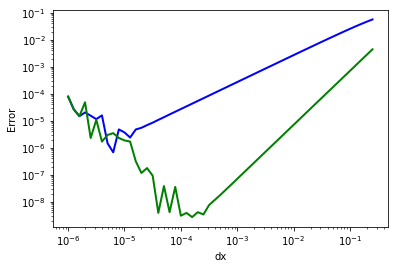

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr1=[]
yarr2=[]

for dx in 10**np.arange(-6., -0.5, 0.1):
    y=dersecond1(np.sin,x,dx)
    dxarr.append(dx)
    yarr1.append(y)
    y=dersecond2(np.sin,x,dx)
    yarr2.append(y)
    
    
plt.plot(dxarr, np.abs(yarr1+np.sin(1.)), 'b-', lw=2)  
plt.plot(dxarr, np.abs(yarr2+np.sin(1.)), 'g-', lw=2)  
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

### Integration: Trapezoid

$\int_{a}^{b}f(x)dx=\frac{h}{2}f(A)+h f(A+h) + h f(A+2h)+......+f(A+(N-2)*h)+\frac{h}{2}f(B)$

In [8]:
def trapezoid(A,B,y,N):
    h = (B-A)/(N-1)
    sum = (y(A)+y(B))/2.*h
    for i in range(1,N-1):
        sum += h*y(A+i*h)     # finish this line for the Trapezoid Rule
    return sum

In [9]:
import numpy as np # integrate sin(x) from 0 to pi
print(trapezoid(0,np.pi,np.sin,100))

1.999832163893992


In [10]:
narr=np.array([])
yarr=np.array([])

for i in 10**np.arange(1,7,0.2):
    y =  trapezoid(0,np.pi,np.sin,int(i))# finish this line for integration
    narr=np.append(narr,int(i))
    yarr=np.append(yarr,y)

### Integration: Simpson's

$\boxed{\int_{a}^{b}f(x)dx=\frac{h}{3}f_{1}+\frac{4h}{3}f_{2}+\frac{2h}{3}f_{3}+\frac{4h}{3}f_{4}+...+\frac{4h}{3}f_{N-3}+\frac{2h}{3}f_{N-2}+\frac{4h}{3}f_{N-1}+\frac{h}{3}f_{N}}$

In [13]:
def Simpson(A,B,y,N):
    if(N%2==0):
        print("N needs to be odd for Simpson's rule")
        return 0;

    h = (B-A)/(N-1)
    sum = (y(A)+y(B))/3.*h+y(B-h)*4./3.*h
    for i in range(1,N-2):                   #NOTE: *** f_2 corresponds to i=1 ***
        if(i%2==0): # **ODD TERMS**
            sum += (2./3.*y(A+i*h))*h
        if(i%2==1): # **EVEN TERMS**
            sum += (4./3.*y(A+i*h))*h

    return sum

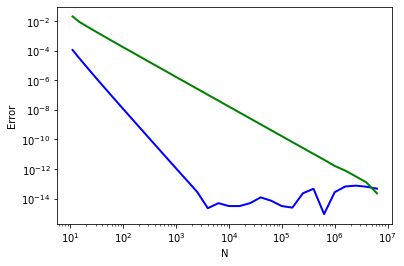

In [12]:
import numpy as np
import matplotlib.pyplot as plt

narr=np.array([])
yarr2=np.array([])

for i in 10**np.arange(1,7,0.2):
    y=Simpson(0,np.pi,np.sin,int(i/2)*2+1)
    narr=np.append(narr,int(i/2)*2+1)
    yarr2=np.append(yarr2,y)
    
plt.plot(narr, np.abs(yarr2-2.), 'b-', lw=2)   
plt.plot(narr, np.abs(yarr-2.), 'g-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

### Trial-and-Error Roots via Bisection

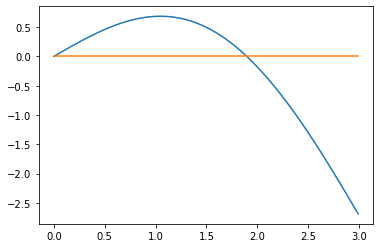

In [14]:
## Always a good idea to draw the function first
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2.*np.sin(x)-x

t = np.arange(0.0, 3.0, 0.01)
s = f(t)
plt.plot(t, s)
s2 = np.zeros(len(t))
plt.plot(t,s2)
plt.show()

In [17]:
def bisection(xmin,xmax, Nmax, eps,f): #xmin is the left bound and xmax is the right bound,
    for i in range(0,Nmax):            #Nmax is the iteration limit, eps is the error, and f is the function
        x=(xmin+xmax)/2.
        if(f(xmin)*f(x)>0):
            xmin=(xmin+xmax)/2.
        else:
            xmax=(xmin+xmax)/2. # please finish this line
        if(abs(f(x))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",abs(f(x)))
            break
    return x

In [19]:
eps = 1.e-8
a=0.5
b=3.
nmax=100
root = bisection(a,b,nmax,eps,f)# please call bisection function to calculate the root

Root is at 1.8954942673444748  after  24  iterations, with a precision of  5.086029375434009e-10
